
## Importing all the libraries needed for the model.
#### pandas for
#### numpy for
#### boto3
#### matplotlib
#### RandomForestClassifier
#### Seaborn
#### BytesIO , StringIO
#### gzip

In [43]:
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO, StringIO 
import gzip
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## Importing the transformed dataset from the s3 bucket 'output-project-bucket' to dataframe 

In [44]:
bucket_name = 'output-project-bucket'
s3_client = boto3.client('s3')
response = s3_client.list_objects_v2(Bucket=bucket_name)
dataframes = []
for obj in response.get('Contents', []):
    key = obj['Key']
    response_segment = s3_client.get_object(Bucket=bucket_name, Key=key)
    
    
    data = response_segment['Body'].read()
    try:
        with gzip.open(BytesIO(data)) as f:
            data_segment = f.read().decode('utf-8')
    except OSError:
        
        data_segment = data.decode('utf-8')
    
    df = pd.read_csv(StringIO(data_segment))
    dataframes.append(df)
dataframe = pd.concat(dataframes, ignore_index=True)
dataframe.head()

,Age,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Electronics And Communication,1,8,1,1
1,21,Computer Science,0,7,1,1
2,22,Information Technology,1,6,0,1
3,21,Information Technology,0,8,1,1
4,22,Mechanical,0,8,0,1


## Converting Stream column data into string . 
#### It contains string data such as 'Electronics And Communication', 'Computer Science','Information Technology', 'Mechanical', 'Electrical', 'Civil'. 
#### So coverting each string with a numeric valur Electronics And Communication = 0, Computer Science = 1,Information Technology= 2, Mechanical = 3, Electrical = 4, Civil =5

In [45]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [46]:
dataframe['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [47]:
dataframe.head()

,Age,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,1,8,1,1
1,21,1,0,7,1,1
2,22,2,1,6,0,1
3,21,2,0,8,1,1
4,22,3,0,8,0,1


In [48]:
import matplotlib.pyplot as plt

In [49]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
backlog=dataframe['HistoryOfBacklogs']
Y=dataframe['PlacedOrNot']

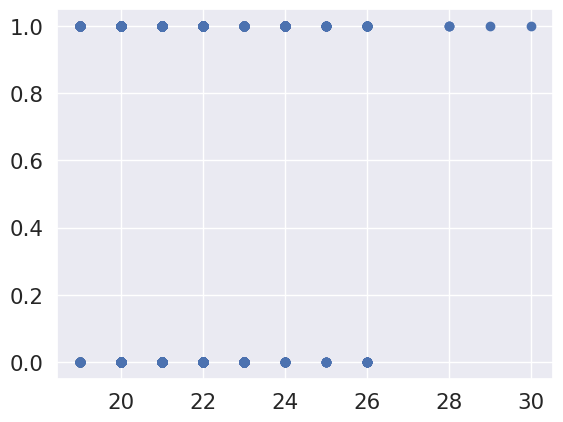

In [50]:
plt.scatter(age,Y)

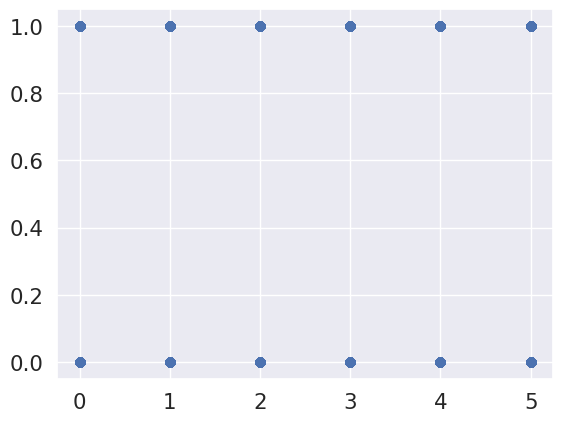

In [51]:
plt.scatter(stream,Y)

/tmp/ipykernel_1523/834945429.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age)


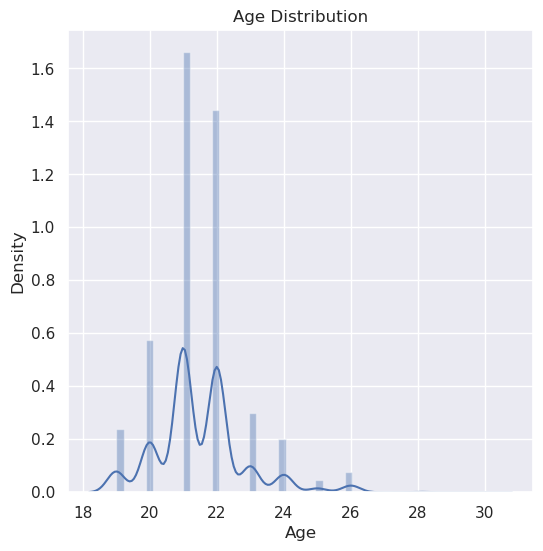

In [52]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(age)
plt.title('Age Distribution')
plt.show()

/tmp/ipykernel_1523/1252887260.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stream)


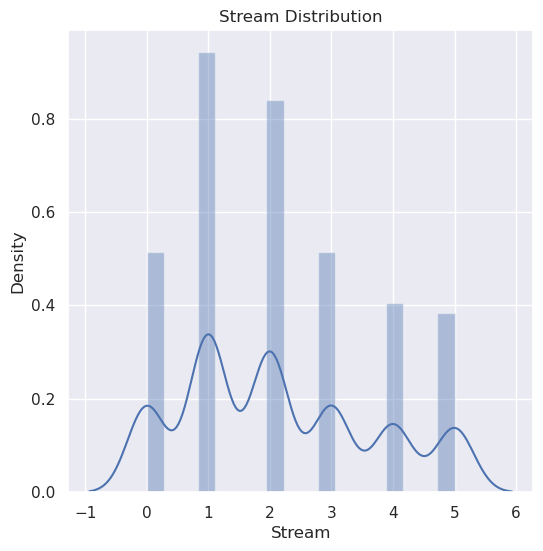

In [53]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(stream)
plt.title('Stream Distribution')
plt.show()

/tmp/ipykernel_1523/2154358294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(internship)


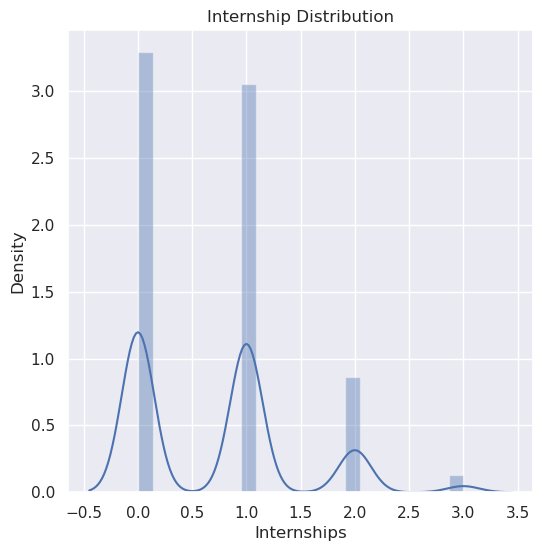

In [54]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(internship)
plt.title('Internship Distribution')
plt.show()

/tmp/ipykernel_1523/2000988274.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cgpa)


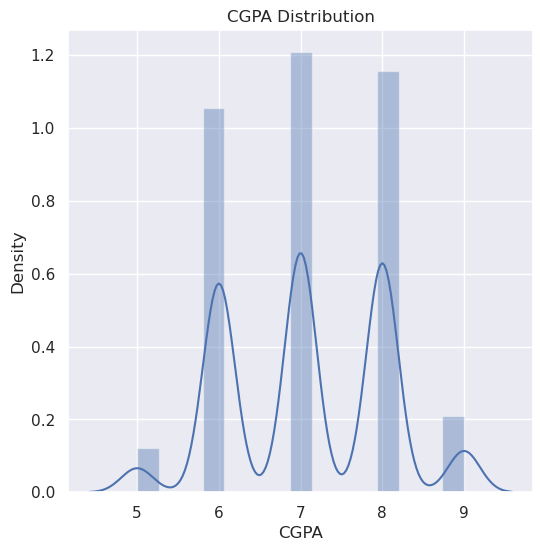

In [55]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(cgpa)
plt.title('CGPA Distribution')
plt.show()

/tmp/ipykernel_1523/25956197.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(backlog)


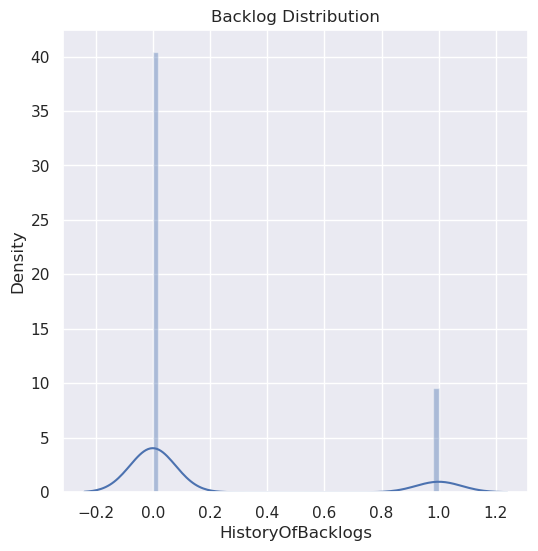

In [56]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(backlog)
plt.title('Backlog Distribution')
plt.show()

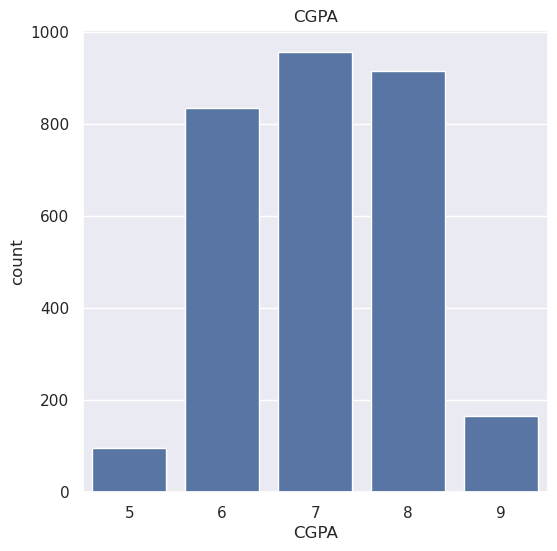

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(x=cgpa, data=dataframe)
plt.title('CGPA')
plt.show()

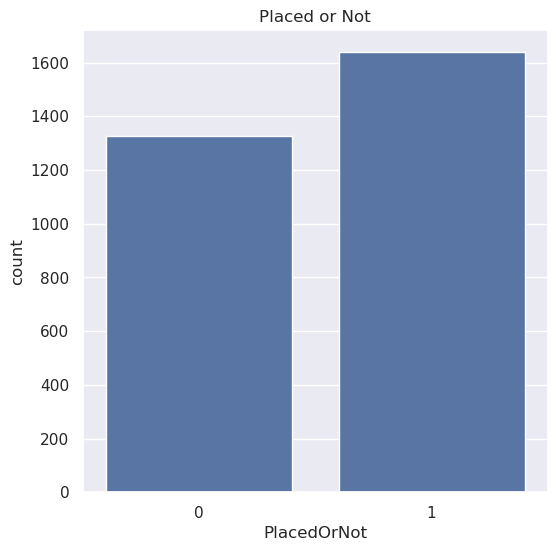

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(x=Y, data=dataframe)
plt.title('Placed or Not')
plt.show()

## Correlation Matrix : Visualize the correlation between numerical features

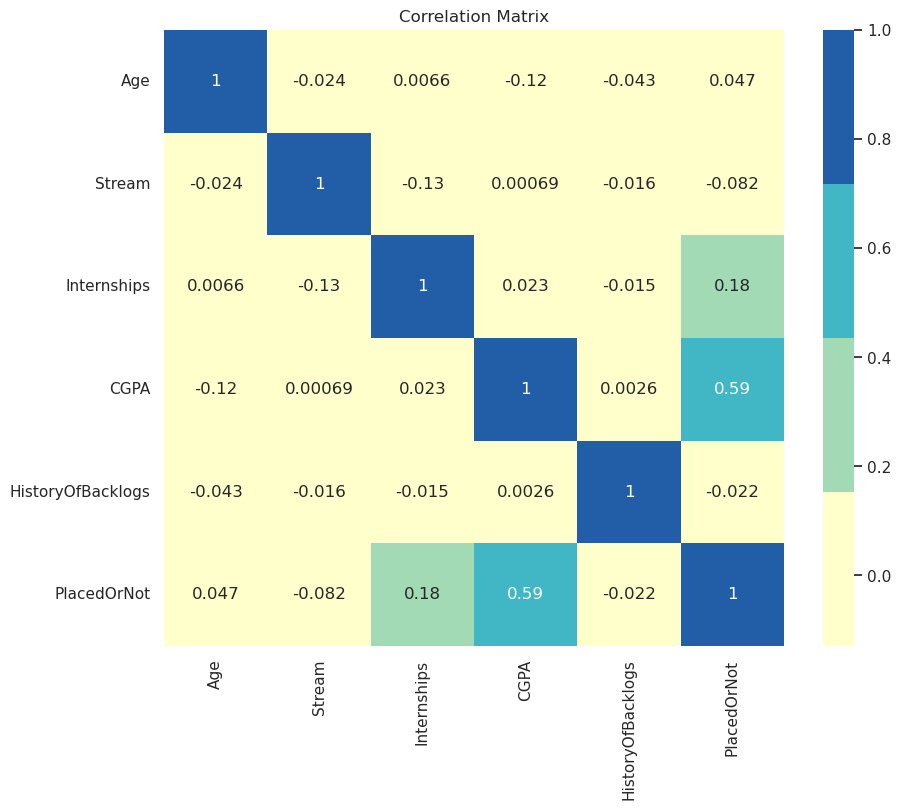

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom colormap with modified color intensity
custom_cmap = sns.color_palette(['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8'])
correlation_matrix = dataframe.corr()

# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.title('Correlation Matrix')
plt.show()

## Selecting Columns for Features and target and training the model using Random Forest Classifier

In [60]:
Y= dataframe["PlacedOrNot"]
X= dataframe.drop(["PlacedOrNot"],axis = 1)

In [61]:
X

,Age,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,1,8,1
1,21,1,0,7,1
2,22,2,1,6,0
3,21,2,0,8,1
4,22,3,0,8,0
...,...,...,...,...,...
2961,23,2,0,7,0
2962,23,3,1,7,0
2963,22,2,1,7,0
2964,22,1,1,7,0


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.1)

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
train_accuracy = forest.score( X_train, Y_train)
train_accuracy

0.910828025477707

In [64]:
predictions = forest.predict(X_test)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score , accuracy_score ,roc_auc_score
print("accuracy_score : " +str(accuracy_score(Y_test,predictions )))

accuracy_score : 0.8922558922558923


## Confusion matrix of output

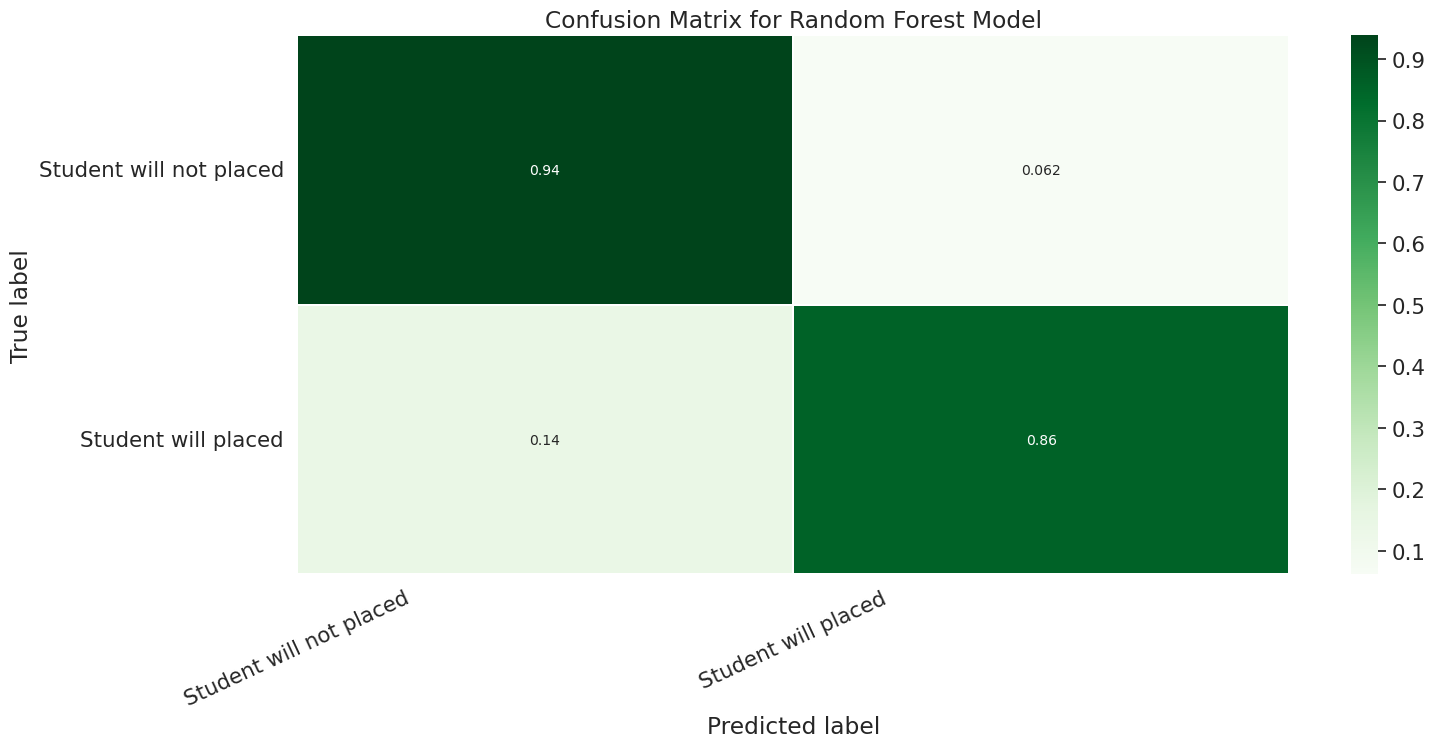

In [65]:
matrix = confusion_matrix(Y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Student will not placed', 'Student will placed']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Providing custom data to the model

In [68]:
categ = ['Student will not placed', 'Student will placed']
custom_data = [[22,0,0,5,1]]
predictions = forest.predict(custom_data)
predictions_custom = predictions[0]
print(categ[int(predictions_custom)])

Student will not placed


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:

pickleout = open("student_placement_prediction.pkl",'wb')
pickle.dump(forest, pickleout)
pickleout.close()

In [71]:
pkl_in = open("student_placement_prediction.pkl",'rb')
reg = pickle.load(pkl_in)
categ = ['Student will not placed', 'Student will placed']
custom_data = [[22,0,0,5,1]]
prediction = reg.predict(pd.DataFrame(custom_data))
predictions_custom = prediction[0]
print(categ[int(predictions_custom)])
#prediction = reg.predict(pd.DataFrame(X_train,index=[4]))

Student will not placed


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
